In [1]:
setwd('D:/Workspace/R')

In [2]:
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
df = read.csv('sales_data.csv')

In [4]:
head(df)

YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
200901,건강음료,37,1410,1543,4,126753,151,12
200902,건강음료,37,1209,1543,9,113399,3014,8
200903,건강음료,38,1348,1547,12,129162,1383,9
200904,건강음료,38,1377,1500,19,126277,3564,8
200905,건강음료,40,1406,1528,25,129584,9288,12
200906,건강음료,39,1343,1623,27,123218,9998,8


In [5]:
summary(df)

       YM                    CATEGORY     ITEM_CNT          QTY      
 Min.   :200901   건강음료       :60   Min.   : 1.00   Min.   :  24  
 1st Qu.:201005   과즙음료       :60   1st Qu.:16.00   1st Qu.:1088  
 Median :201108   비타민음료     :60   Median :38.00   Median :1756  
 Mean   :201113   스포츠,이온음료:60   Mean   :33.63   Mean   :2057  
 3rd Qu.:201210   에너지음료     :46   3rd Qu.:47.50   3rd Qu.:2568  
 Max.   :201312   일반탄산음료   :60   Max.   :83.00   Max.   :9079  
                  차음료         :60                                 
     PRICE          MAXTEMP         SALEDAY          RAIN_DAY    
 Min.   :  800   Min.   :-1.00   Min.   :113399   Min.   :    0  
 1st Qu.: 1419   1st Qu.:10.00   1st Qu.:145035   1st Qu.: 2824  
 Median : 1554   Median :20.00   Median :183473   Median : 5973  
 Mean   : 2178   Mean   :17.59   Mean   :183373   Mean   : 9458  
 3rd Qu.: 1935   3rd Qu.:27.00   3rd Qu.:228142   3rd Qu.:13699  
 Max.   :12456   Max.   :31.00   Max.   :245068   Max.   :43058  
            

In [6]:
product1 = df %>% filter(df$CATEGORY == '과즙음료')
product2 = df %>% filter(df$CATEGORY == '비타민음료')
product3 = df %>% filter(df$CATEGORY == '차음료')

product1 = product1[-c(2, 3)]
product2 = product2[-c(2, 3)]
product3 = product3[-c(2, 3)]

In [7]:
shapiro.test(product1$QTY)
shapiro.test(product2$QTY)
shapiro.test(product3$QTY)


	Shapiro-Wilk normality test

data:  product1$QTY
W = 0.97503, p-value = 0.255



	Shapiro-Wilk normality test

data:  product2$QTY
W = 0.95973, p-value = 0.04565



	Shapiro-Wilk normality test

data:  product3$QTY
W = 0.96497, p-value = 0.0825


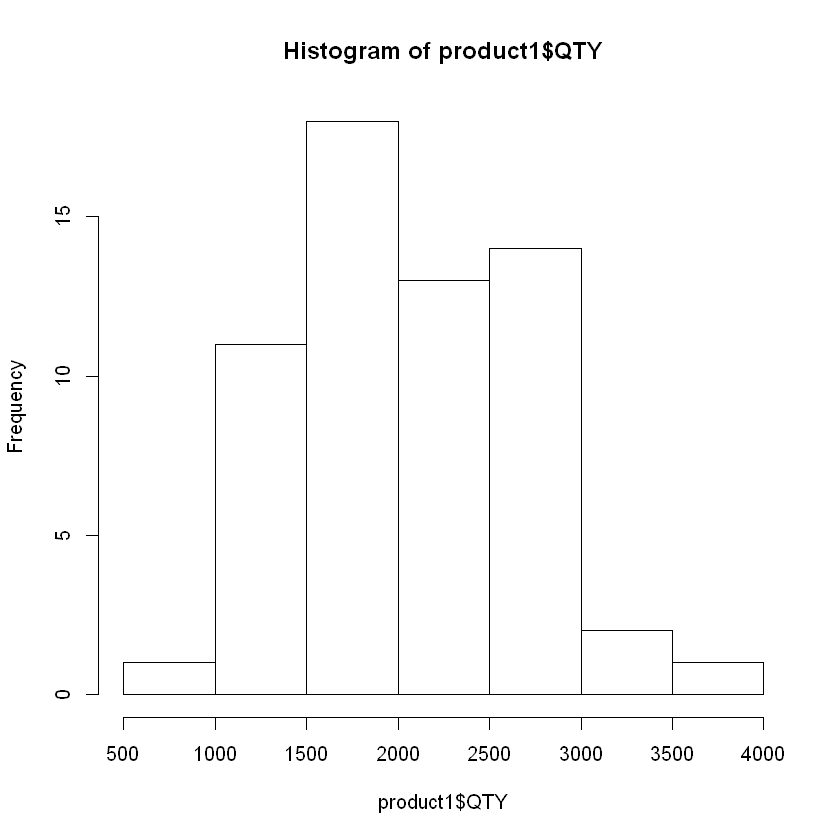

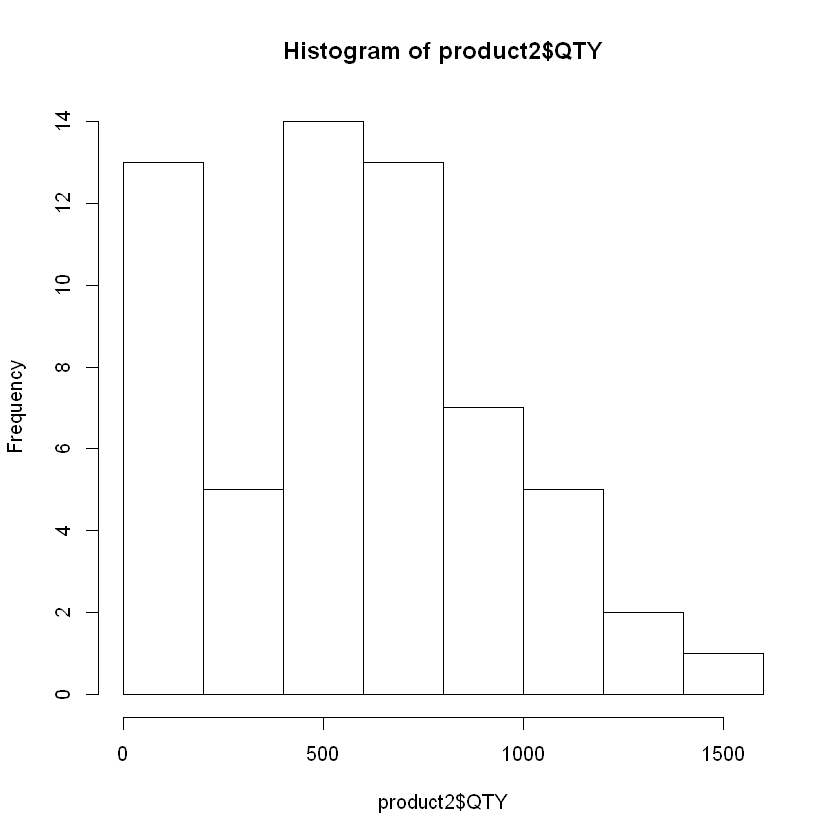

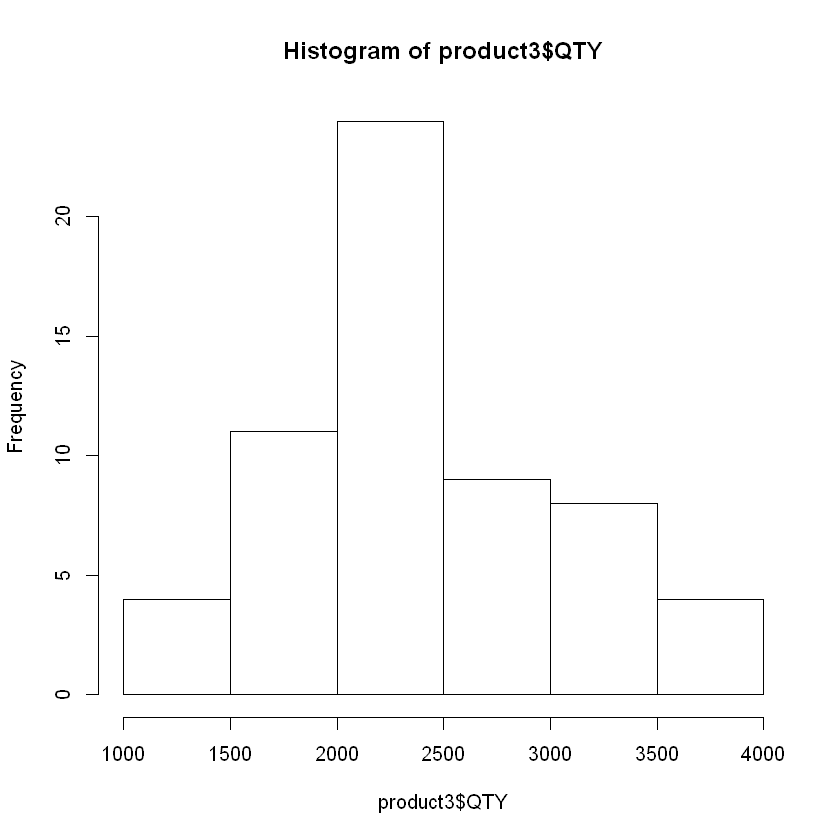

In [8]:
hist(product1$QTY)
hist(product2$QTY)
hist(product3$QTY)

In [9]:
cor(product1)
cor(product2)
cor(product3)

,YM,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
YM,1.00000000,0.48166634,-0.59583153,-0.0213870757,0.96415953,0.19579703,0.1477518768
QTY,0.48166634,1.00000000,-0.09838038,0.7071806840,0.50189095,0.47567660,0.1367153610
PRICE,-0.59583153,-0.09838038,1.00000000,-0.0843639944,-0.61948901,-0.21129511,-0.1157278564
MAXTEMP,-0.02138708,0.70718068,-0.08436399,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.96415953,0.50189095,-0.61948901,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.19579703,0.47567660,-0.21129511,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.14775188,0.13671536,-0.11572786,-0.0007330759,0.15091686,-0.05135136,1.0000000000


,YM,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
YM,1.00000000,0.6973076,0.86444562,-0.0213870757,0.96415953,0.19579703,0.1477518768
QTY,0.69730757,1.0000000,0.72105041,0.3615501216,0.71192476,0.51181463,0.1201901927
PRICE,0.86444562,0.7210504,1.00000000,-0.0447921578,0.82446317,0.20432138,0.1188034038
MAXTEMP,-0.02138708,0.3615501,-0.04479216,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.96415953,0.7119248,0.82446317,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.19579703,0.5118146,0.20432138,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.14775188,0.1201902,0.11880340,-0.0007330759,0.15091686,-0.05135136,1.0000000000


,YM,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
YM,1.00000000,0.6126286,0.75571298,-0.0213870757,0.96415953,0.19579703,0.1477518768
QTY,0.61262860,1.0000000,0.51443998,0.6762249882,0.66706580,0.53253647,0.1490117845
PRICE,0.75571298,0.5144400,1.00000000,-0.0209906744,0.79781578,0.11965126,0.1516141402
MAXTEMP,-0.02138708,0.6762250,-0.02099067,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.96415953,0.6670658,0.79781578,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.19579703,0.5325365,0.11965126,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.14775188,0.1490118,0.15161414,-0.0007330759,0.15091686,-0.05135136,1.0000000000


In [10]:
out1 = lm(QTY~., data=product1)
out2 = lm(QTY~., data=product2)
out3 = lm(QTY~., data=product3)

In [11]:
both1 = step(out1, direction = 'both', trace = FALSE)
both2 = step(out2, direction = 'both', trace = FALSE)
both3 = step(out3, direction = 'both', trace = FALSE)

In [12]:
out1
out2
out3


Call:
lm(formula = QTY ~ ., data = product1)

Coefficients:
(Intercept)           YM        PRICE      MAXTEMP      SALEDAY     RAIN_DAY  
 -4.500e+05    2.229e+00    7.346e-01    5.585e+01    4.160e-03   -1.073e-02  
    HOLIDAY  
  3.189e+01  



Call:
lm(formula = QTY ~ ., data = product2)

Coefficients:
(Intercept)           YM        PRICE      MAXTEMP      SALEDAY     RAIN_DAY  
  6.987e+04   -3.565e-01    8.435e-01    9.028e+00    3.458e-03    7.280e-03  
    HOLIDAY  
  1.081e+01  



Call:
lm(formula = QTY ~ ., data = product3)

Coefficients:
(Intercept)           YM        PRICE      MAXTEMP      SALEDAY     RAIN_DAY  
 -3.272e+04    1.604e-01    1.076e-01    4.848e+01    9.387e-03   -6.021e-03  
    HOLIDAY  
  2.427e+01  


In [13]:
summary(both1)


Call:
lm(formula = QTY ~ YM + PRICE + MAXTEMP + SALEDAY + RAIN_DAY, 
    data = product1)

Residuals:
    Min      1Q  Median      3Q     Max 
-478.59 -143.21  -14.38  154.11  652.86 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.540e+05  1.642e+05  -2.766  0.00776 ** 
YM           2.250e+00  8.186e-01   2.749  0.00812 ** 
PRICE        7.298e-01  1.080e-01   6.760 1.01e-08 ***
MAXTEMP      5.626e+01  4.364e+00  12.892  < 2e-16 ***
SALEDAY      4.230e-03  2.785e-03   1.519  0.13460    
RAIN_DAY    -1.134e-02  4.197e-03  -2.702  0.00919 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 232.8 on 54 degrees of freedom
Multiple R-squared:  0.8752,	Adjusted R-squared:  0.8636 
F-statistic: 75.74 on 5 and 54 DF,  p-value: < 2.2e-16


In [14]:
summary(both2)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY, data = product2)

Residuals:
    Min      1Q  Median      3Q     Max 
-374.17 -135.59  -35.96   82.13  638.34 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.484e+03  2.664e+02  -5.568 7.93e-07 ***
PRICE        7.950e-01  2.267e-01   3.507  0.00091 ***
MAXTEMP      9.379e+00  3.841e+00   2.442  0.01785 *  
SALEDAY      2.562e-03  1.114e-03   2.300  0.02529 *  
RAIN_DAY     7.018e-03  3.723e-03   1.885  0.06470 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 204.7 on 55 degrees of freedom
Multiple R-squared:  0.7205,	Adjusted R-squared:  0.7002 
F-statistic: 35.44 on 4 and 55 DF,  p-value: 1.243e-14


In [15]:
summary(both3)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY + RAIN_DAY, data = product3)

Residuals:
   Min     1Q Median     3Q    Max 
-461.8 -118.3  -23.7  112.5  871.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.451e+02  1.469e+02  -1.669    0.101    
MAXTEMP      4.859e+01  4.172e+00  11.647   <2e-16 ***
SALEDAY      1.026e-02  7.222e-04  14.205   <2e-16 ***
RAIN_DAY    -6.429e-03  4.067e-03  -1.581    0.120    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 227.4 on 56 degrees of freedom
Multiple R-squared:  0.8844,	Adjusted R-squared:  0.8782 
F-statistic: 142.8 on 3 and 56 DF,  p-value: < 2.2e-16


In [16]:
anova(both1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
YM,1,5438592.4,5438592.41,100.385750,6.387889e-14
PRICE,1,1292948.7,1292948.68,23.865297,9.610942e-06
MAXTEMP,1,13241238.3,13241238.25,244.407290,1.071913e-21
SALEDAY,1,148078.9,148078.88,2.733246,1.040822e-01
RAIN_DAY,1,395547.4,395547.38,7.301029,9.190442e-03
Residuals,54,2925554.6,54176.94,NA,NA


In [17]:
anova(both2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PRICE,1,4286276.4,4286276.39,102.302949,3.706056e-14
MAXTEMP,1,1281378.3,1281378.34,30.583371,9.114061e-07
SALEDAY,1,223276.5,223276.53,5.329065,2.475744e-02
RAIN_DAY,1,148893.1,148893.08,3.553714,6.469945e-02
Residuals,55,2304383.3,41897.88,NA,NA


In [18]:
anova(both3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
MAXTEMP,1,11456238.0,11456238.03,221.561761,4.056595e-21
SALEDAY,1,10571950.1,10571950.15,204.459778,2.426452e-20
RAIN_DAY,1,129225.9,129225.89,2.499208,1.195359e-01
Residuals,56,2895577.9,51706.75,NA,NA
